In [ ]:
#Load dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Customer Churn Dataset.xlsx")
#Show Dataset Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [ ]:
#Checking for duplicates
duplicate_rows = df.duplicated().sum()
print("No. of duplicate rows:",duplicate_rows)

No. of duplicate rows: 0


In [ ]:
df_new = df.copy()

In [ ]:
#Removing unwanted columns
df_new.drop(['customerID'], axis=1, inplace=True)

In [ ]:
#Converting Datatypes
df_new['TotalCharges']=pd.to_numeric(df_new['TotalCharges'], errors='coerce')
df_new.dropna(subset=['TotalCharges'], inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
encoders={}
for column in df_new.select_dtypes(include='object').columns:
  le= LabelEncoder()
  df_new[column] = le.fit_transform(df_new[column])
  encoders[column]=le

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [ ]:
scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure','numAdminTickets','numTechTickets']
df_new[num_cols]= scaler.fit_transform(df_new[num_cols])

In [ ]:
print("Shape of new data:", df_new.shape)
df_new.head()
df_new.describe()

Shape of new data: (7032, 22)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,-1.126643e-16,0.903299,0.940557,0.872582,0.789249,0.905859,...,0.984926,0.992890,0.688567,0.592719,1.573237,6.062651e-17,-1.119064e-16,3.637591e-17,-4.850121e-17,0.265785
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.948627,0.737271,0.859962,0.880394,...,0.885285,0.885385,0.832934,0.491363,1.067504,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.547283e+00,-9.990692e-01,-4.042388e-01,-3.359369e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-9.709769e-01,-8.302488e-01,-4.042388e-01,-3.359369e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,2.000000,1.845440e-01,-3.908151e-01,-4.042388e-01,-3.359369e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,8.331482e-01,6.668271e-01,-4.042388e-01,-3.359369e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,1.793381e+00,2.824261e+00,3.520930e+00,6.858910e+00,1.000000


/tmp/ipython-input-1298204096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_new, palette='Set2')


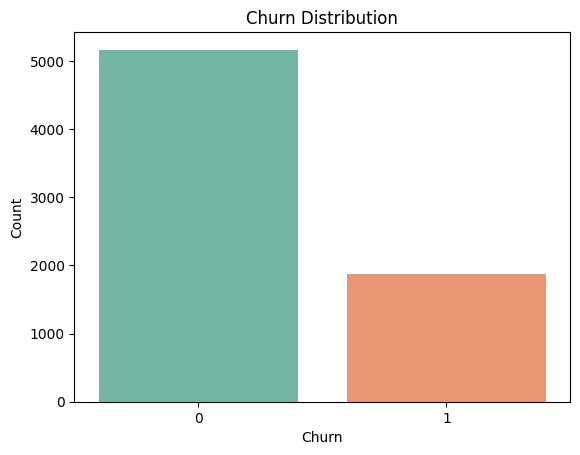

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df_new, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

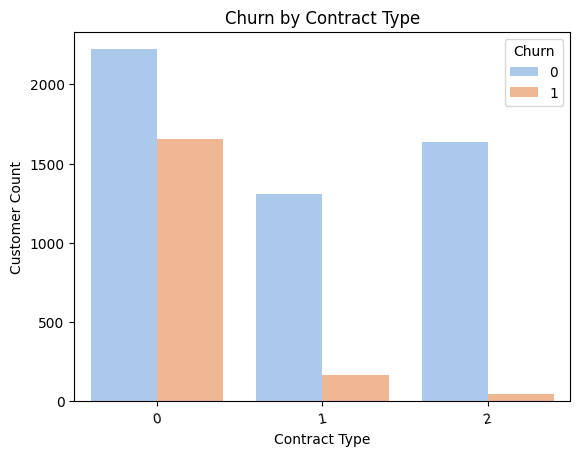

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df_new, palette='pastel')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(title='Churn')
plt.xticks(rotation=10)
plt.show()

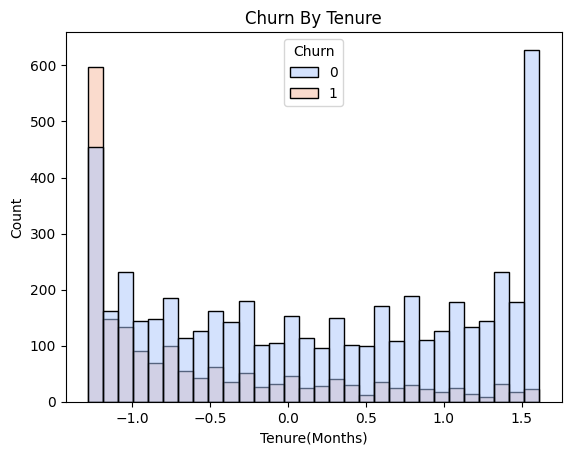

In [ ]:
sns.histplot(data=df_new, x='tenure',hue='Churn',bins=30, palette='coolwarm')
plt.title("Churn By Tenure")
plt.xlabel("Tenure(Months)")
plt.ylabel("Count")
plt.show()

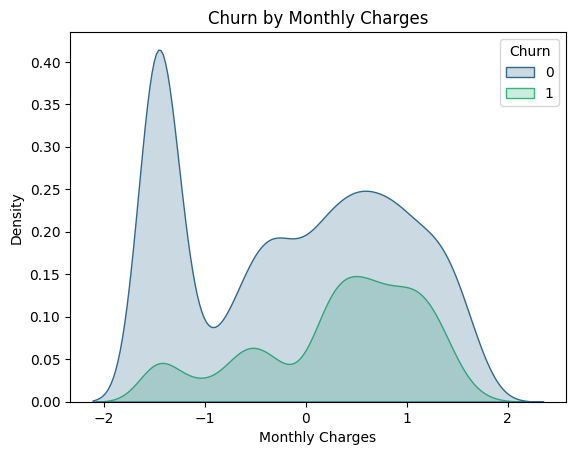

In [ ]:
sns.kdeplot(x='MonthlyCharges', data=df_new, hue='Churn',fill= True, palette='viridis')
plt.title("Churn by Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

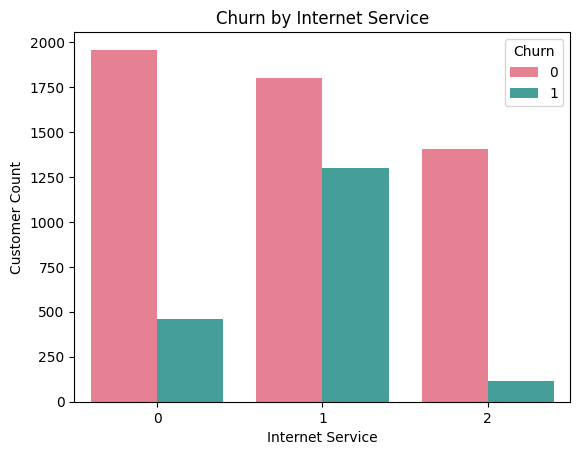

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df_new, palette='husl')
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Customer Count")
plt.legend(title='Churn')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x= df_new.drop('Churn', axis=1)
y= df_new['Churn']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)

Training Data Shape: (5625, 21)
Testing Data Shape: (1407, 21)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(C=0.5, max_iter=1000, class_weight='balanced')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Logistic Regression: \nAccuracy SCore:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Logistic Regression: 
Accuracy SCore: 0.8180525941719972

Confusion Matrix:
 [[826 207]
 [ 49 325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87      1033
           1       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

print("Decision Tree: \nAccuracy SCore:", accuracy_score(y_test,y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test,y_pred_dt))

Decision Tree: 
Accuracy SCore: 0.8123667377398721

Confusion Matrix:
 [[819 214]
 [ 50 324]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1033
           1       0.60      0.87      0.71       374

    accuracy                           0.81      1407
   macro avg       0.77      0.83      0.79      1407
weighted avg       0.85      0.81      0.82      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced_subsample',max_depth=9, min_samples_split=10, min_samples_leaf=4)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Results: \nAccuracy SCore:", accuracy_score(y_test,y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test,y_pred_rf))

Random Forest Results: 
Accuracy SCore: 0.8251599147121536

Confusion Matrix:
 [[842 191]
 [ 55 319]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87      1033
           1       0.63      0.85      0.72       374

    accuracy                           0.83      1407
   macro avg       0.78      0.83      0.80      1407
weighted avg       0.86      0.83      0.83      1407



In [ ]:
# Final model metrics based on your output
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.818, 0.812, 0.825],
    'Recall_Churn_1': [0.87, 0.87, 0.85],
    'F1_Churn_1': [0.72, 0.71, 0.72]
})
print(model_results)

                 Model  Accuracy  Recall_Churn_1  F1_Churn_1
0  Logistic Regression     0.818            0.87        0.72
1        Decision Tree     0.812            0.87        0.71
2        Random Forest     0.825            0.85        0.72


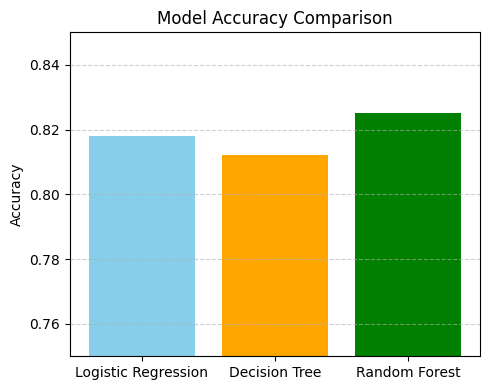

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(model_results['Model'], model_results['Accuracy'], color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.75, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

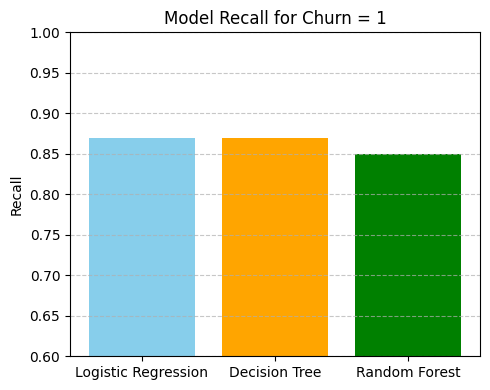

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(model_results['Model'], model_results['Recall_Churn_1'], color=['skyblue', 'orange', 'green'])
plt.title('Model Recall for Churn = 1')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

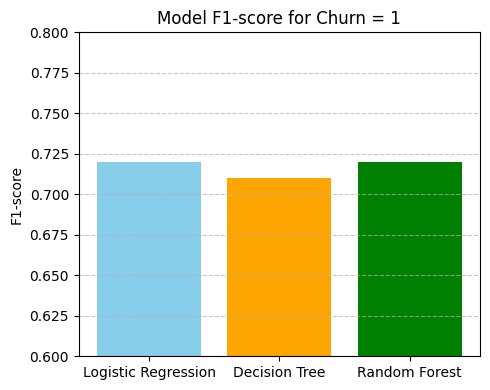

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(model_results['Model'], model_results['F1_Churn_1'], color=['skyblue', 'orange', 'green'])
plt.title('Model F1-score for Churn = 1')
plt.ylabel('F1-score')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files

In [ ]:
df_new.to_csv('cleaned_data.csv', index=False)

In [ ]:
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>